# 0. Loading packages

If not all libraries are installed, uncomment the cell below

In [29]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
%pip install librosa
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install librosa
%pip install listdir




Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement listdir (from versions: none)
ERROR: No matching distribution found for listdir

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import warnings 

warnings.filterwarnings('ignore')

from functions import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

from os import listdir

pd.set_option('display.max_columns', None)

### Kaggle

Group 1

Jenewein Matthias - Jenewein Matthias

Kalarickal Dominic - Kalarickal Dominic

Leander Leirissa - Bitterzoet

Timmer Lars - laltir

# 1. Loading data

In [32]:
labeled_files = os.listdir('Datasets/labeled')
unlabeled_files = os.listdir('Datasets/unlabeled')

print("Labeled files:", labeled_files)
print("Unlabeled files:", unlabeled_files)

Labeled files: ['m00002.wav', 'm00039.wav', 'm00041.wav', 'm00072.wav', 'm00096.wav', 'm00102.wav', 'm00112.wav', 'm00138.wav', 'm00192.wav', 'm00206.wav', 'm00230.wav', 'm00236.wav', 'm00248.wav', 'm00253.wav', 'm00298.wav', 'm00313.wav', 'm00338.wav', 'm00339.wav', 'm00351.wav', 'm00400.wav', 'm00421.wav', 'm00429.wav', 'm00435.wav', 'm00454.wav', 'm00477.wav', 'm00501.wav', 'm00503.wav', 'm00513.wav', 'm00553.wav', 'm00606.wav', 'm00623.wav', 'm00627.wav', 'm00629.wav', 'm00633.wav', 'm00637.wav', 'm00658.wav', 'm00671.wav', 'm00676.wav', 'm00677.wav', 'm00678.wav', 'm00716.wav', 'm00762.wav', 'm00772.wav', 'm00773.wav', 'm00801.wav', 'm00821.wav', 'm00850.wav', 'm00867.wav', 'm00895.wav', 'm00996.wav']
Unlabeled files: ['m00003.wav', 'm00012.wav', 'm00013.wav', 'm00043.wav', 'm00044.wav', 'm00055.wav', 'm00061.wav', 'm00063.wav', 'm00069.wav', 'm00074.wav', 'm00107.wav', 'm00114.wav', 'm00127.wav', 'm00137.wav', 'm00139.wav', 'm00148.wav', 'm00149.wav', 'm00156.wav', 'm00183.wav', 

In [33]:
labeled_files = [f for f in os.listdir("Datasets/labeled") if f.endswith(".wav")]
# or do a quick check:
for f in labeled_files:
    print(repr(f))  

'm00002.wav'
'm00039.wav'
'm00041.wav'
'm00072.wav'
'm00096.wav'
'm00102.wav'
'm00112.wav'
'm00138.wav'
'm00192.wav'
'm00206.wav'
'm00230.wav'
'm00236.wav'
'm00248.wav'
'm00253.wav'
'm00298.wav'
'm00313.wav'
'm00338.wav'
'm00339.wav'
'm00351.wav'
'm00400.wav'
'm00421.wav'
'm00429.wav'
'm00435.wav'
'm00454.wav'
'm00477.wav'
'm00501.wav'
'm00503.wav'
'm00513.wav'
'm00553.wav'
'm00606.wav'
'm00623.wav'
'm00627.wav'
'm00629.wav'
'm00633.wav'
'm00637.wav'
'm00658.wav'
'm00671.wav'
'm00676.wav'
'm00677.wav'
'm00678.wav'
'm00716.wav'
'm00762.wav'
'm00772.wav'
'm00773.wav'
'm00801.wav'
'm00821.wav'
'm00850.wav'
'm00867.wav'
'm00895.wav'
'm00996.wav'


In [34]:
dl = DataLoader()

labeled_data = dl.get_data(labeled_files, path='Datasets/labeled', max_workers=6)
unlabeled_data = dl.get_data(unlabeled_files, path='Datasets/unlabeled', max_workers=6)

# 2. Data exploration

In [35]:
display(labeled_data.head())
display(labeled_data.tail())

,m00039.wav,m00041.wav,m00102.wav,m00002.wav,m00112.wav,m00138.wav,m00192.wav,m00206.wav,m00230.wav,m00236.wav,m00248.wav,m00253.wav,m00096.wav,m00298.wav,m00313.wav,m00338.wav,m00339.wav,m00351.wav,m00400.wav,m00421.wav,m00429.wav,m00435.wav,m00072.wav,m00454.wav,m00477.wav,m00501.wav,m00503.wav,m00513.wav,m00553.wav,m00606.wav,m00623.wav,m00627.wav,m00629.wav,m00633.wav,m00637.wav,m00658.wav,m00671.wav,m00676.wav,m00677.wav,m00678.wav,m00716.wav,m00762.wav,m00772.wav,m00773.wav,m00801.wav,m00821.wav,m00850.wav,m00867.wav,m00895.wav,m00996.wav
0,-0.094788,0.078033,0.007843,-0.016357,-0.002625,-0.026306,0.069672,-0.111206,0.120087,-0.006622,0.051422,-0.236969,-0.036072,0.046478,-0.033386,-0.213593,0.059265,0.090729,0.042816,-0.121704,0.282593,-0.072723,0.106079,-0.157288,-0.000366,-0.281555,0.022217,-0.094635,-0.081451,0.037262,0.284760,0.037415,0.090332,0.065186,0.249695,-0.010315,-0.133453,0.357910,-0.177551,-0.062012,-0.032074,-0.158539,-0.034149,0.061676,0.062622,-0.187012,-0.189209,0.072723,0.048950,-0.063629
1,-0.153381,-0.037659,0.007263,-0.022827,-0.003754,-0.028778,0.065948,-0.198212,0.170898,-0.009186,0.070953,-0.296875,-0.105682,0.063995,-0.050201,-0.357239,0.063324,0.138855,0.067963,-0.118591,0.357483,-0.125763,0.084961,-0.273651,-0.002869,-0.360931,0.029694,-0.114075,-0.068909,0.029816,0.240753,-0.072571,0.119537,0.103699,0.380066,-0.001038,-0.126984,0.397919,-0.238892,-0.064758,-0.057587,-0.155304,-0.038361,0.061035,0.059814,-0.113556,-0.242401,0.103699,0.016876,-0.037994
2,-0.143921,0.126648,0.005829,-0.014679,-0.003876,-0.013489,0.042389,-0.139313,0.117401,-0.006104,0.023956,-0.080994,-0.201233,0.043274,-0.031281,-0.314301,0.033295,0.082733,0.060791,-0.126831,0.162445,-0.119934,0.062103,-0.235016,-0.005310,-0.401917,0.032318,-0.135742,-0.023407,0.023865,0.319092,-0.114807,0.108215,0.078186,0.306458,0.016266,-0.122009,0.328705,-0.156708,0.012695,-0.045929,-0.159088,0.003082,0.060059,0.058044,-0.061249,-0.168579,0.102112,0.060913,-0.043274
3,-0.153412,0.165619,0.004211,-0.011780,-0.003296,-0.010742,0.025787,-0.076721,0.033844,-0.006622,0.105255,-0.057129,-0.279602,0.038269,-0.032928,-0.318817,0.029419,0.024658,0.063019,-0.130829,0.125000,-0.123688,0.050476,-0.214355,-0.006348,-0.418518,0.048889,-0.164124,-0.005432,0.006287,0.237976,-0.083191,0.155823,0.080322,0.294525,0.011810,-0.119202,0.266815,-0.175476,0.064789,-0.041931,-0.159302,0.021759,0.079346,0.060059,-0.056824,-0.084442,0.107117,0.076813,-0.060059
4,-0.151947,0.029724,0.003113,-0.006683,-0.003601,0.001587,0.009857,-0.050323,0.023102,-0.007874,0.076111,-0.057953,-0.315582,0.028412,-0.038513,-0.360016,0.040466,-0.061005,0.063568,-0.136017,0.106567,-0.099884,0.052216,-0.210754,-0.006653,-0.345856,0.057312,-0.177856,0.021484,-0.006744,0.310577,-0.068390,0.160858,0.079132,0.284973,0.004517,-0.118164,0.229553,-0.201569,0.100159,-0.048279,-0.161957,0.004822,0.078644,0.053528,-0.041870,-0.044495,0.104431,0.158356,-0.066376


,m00039.wav,m00041.wav,m00102.wav,m00002.wav,m00112.wav,m00138.wav,m00192.wav,m00206.wav,m00230.wav,m00236.wav,m00248.wav,m00253.wav,m00096.wav,m00298.wav,m00313.wav,m00338.wav,m00339.wav,m00351.wav,m00400.wav,m00421.wav,m00429.wav,m00435.wav,m00072.wav,m00454.wav,m00477.wav,m00501.wav,m00503.wav,m00513.wav,m00553.wav,m00606.wav,m00623.wav,m00627.wav,m00629.wav,m00633.wav,m00637.wav,m00658.wav,m00671.wav,m00676.wav,m00677.wav,m00678.wav,m00716.wav,m00762.wav,m00772.wav,m00773.wav,m00801.wav,m00821.wav,m00850.wav,m00867.wav,m00895.wav,m00996.wav
670335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.480865,NaN
670336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.416382,NaN
670337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.317200,NaN
670338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.331604,NaN
670339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.349121,NaN


<div style="border: 2px solid; background-color:rgb(255, 186, 186); color:rgb(255, 0, 0); padding: 10px; border-radius: 5px; display: inline-block; max-width: 97%;">
<strong>Warning:</strong> Write description
</div>

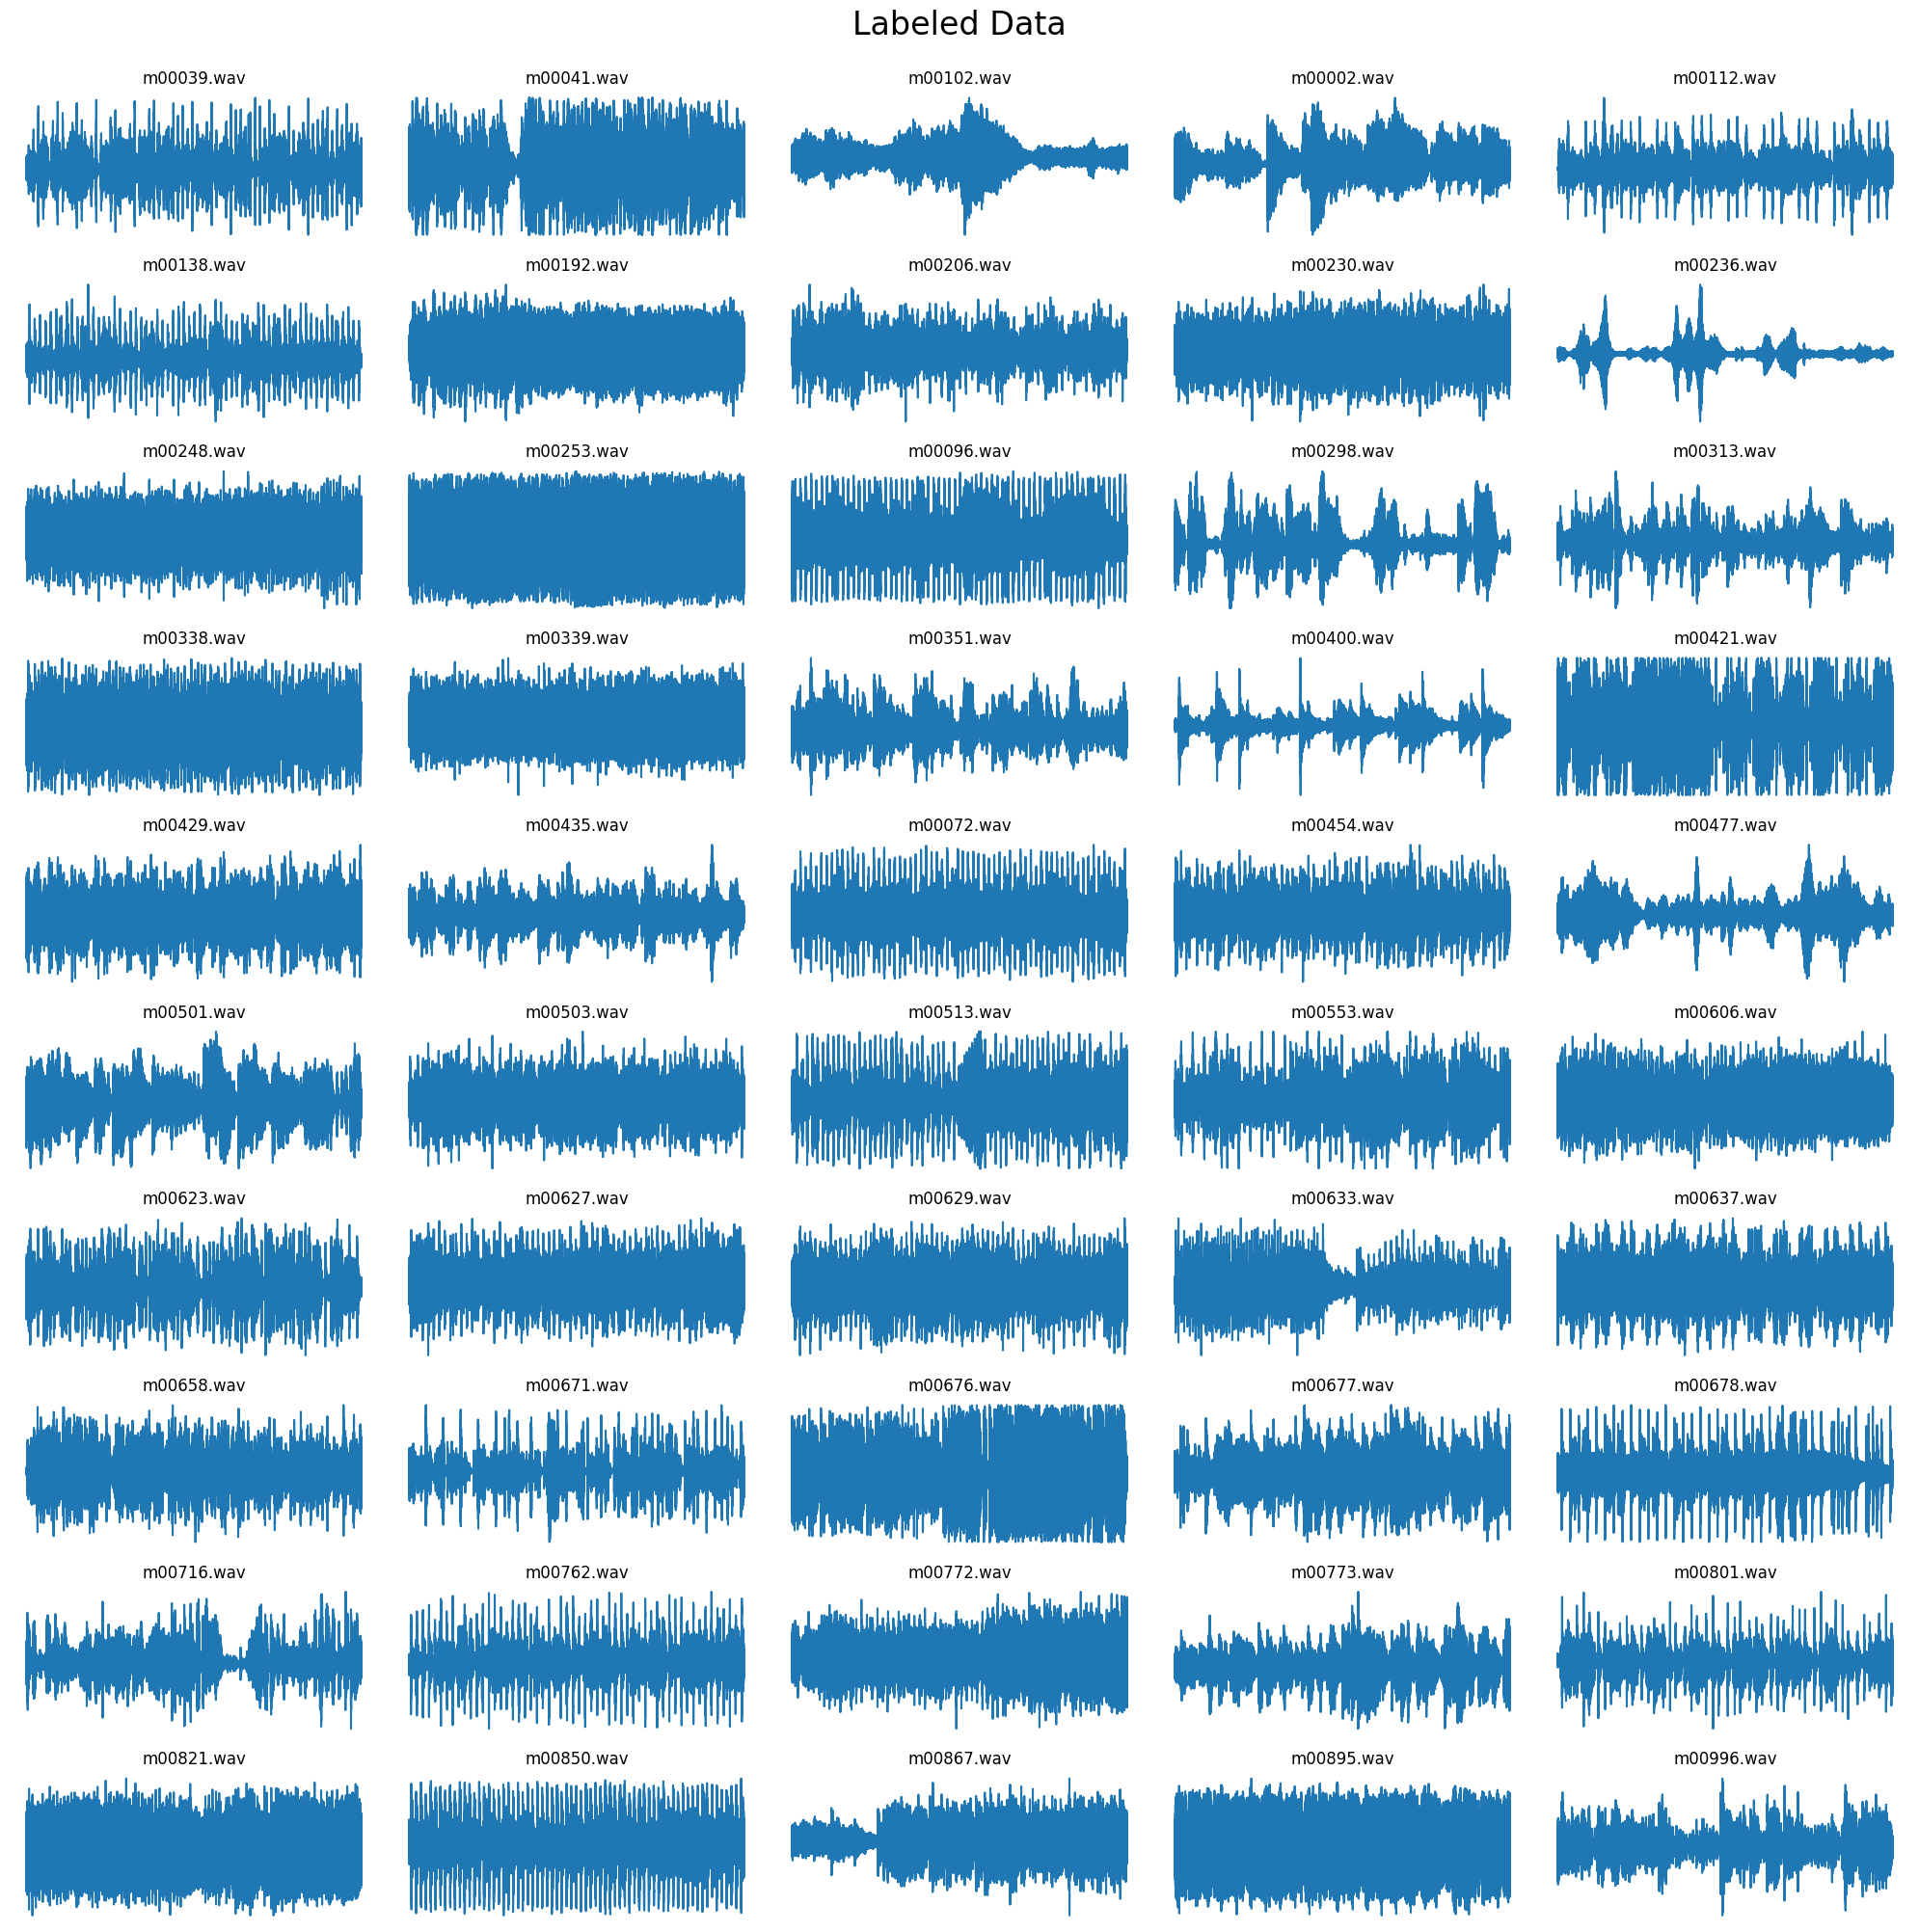

In [36]:
v_la = Visualizer(labeled_data, 'Labeled Data', 10, 5, figsize=(20, 20))
v_la.subplots()

In [37]:
display(unlabeled_data.head())
display(unlabeled_data.tail())

,m00043.wav,m00061.wav,m00063.wav,m00069.wav,m00074.wav,m00003.wav,m00107.wav,m00114.wav,m00127.wav,m00137.wav,m00139.wav,m00148.wav,m00149.wav,m00156.wav,m00183.wav,m00013.wav,m00211.wav,m00218.wav,m00012.wav,m00228.wav,m00247.wav,m00254.wav,m00266.wav,m00044.wav,m00289.wav,m00292.wav,m00293.wav,m00309.wav,m00318.wav,m00321.wav,m00323.wav,m00324.wav,m00331.wav,m00348.wav,m00355.wav,m00356.wav,m00357.wav,m00055.wav,m00359.wav,m00363.wav,m00371.wav,m00372.wav,m00391.wav,m00393.wav,m00399.wav,m00405.wav,m00414.wav,m00434.wav,m00463.wav,m00468.wav,m00487.wav,m00495.wav,m00515.wav,m00528.wav,m00537.wav,m00538.wav,m00549.wav,m00555.wav,m00560.wav,m00570.wav,m00571.wav,m00576.wav,m00581.wav,m00582.wav,m00589.wav,m00597.wav,m00610.wav,m00616.wav,m00624.wav,m00635.wav,m00685.wav,m00705.wav,m00708.wav,m00719.wav,m00730.wav,m00733.wav,m00736.wav,m00755.wav,m00756.wav,m00791.wav,m00806.wav,m00812.wav,m00817.wav,m00824.wav,m00828.wav,m00829.wav,m00833.wav,m00838.wav,m00843.wav,m00852.wav,m00873.wav,m00921.wav,m00927.wav,m00928.wav,m00941.wav,m00947.wav,m00949.wav,m00950.wav,m00961.wav,m00967.wav,m00971.wav,m00973.wav,m00988.wav,m00991.wav,m00995.wav
0,-0.115051,-0.115631,0.034790,0.001678,-0.208252,-0.129364,-0.029175,0.377899,-0.040497,-0.027100,0.028381,-0.029846,-0.226410,0.001678,-0.236969,0.004791,-0.020874,0.295319,-0.003815,0.107208,0.037872,-0.042633,-0.024597,-0.017822,0.133667,0.023346,0.167694,0.026337,0.411072,-0.004120,-0.162201,0.007080,-0.009521,0.001801,-0.138641,0.399872,0.005035,-0.062683,0.039581,-0.027832,0.621979,-0.027710,-0.242096,0.032013,0.039337,-0.003784,0.005646,0.006989,0.012970,0.001373,-0.001984,-0.068909,-0.269196,0.471375,0.000824,-0.079987,0.006012,-0.243866,0.044617,0.312714,-0.033386,0.049347,-0.018097,0.007080,-0.009491,0.010498,-0.079926,-0.016724,0.013275,-0.023010,-0.081268,0.019379,-0.181244,-0.034088,0.116486,0.255707,-0.030426,-0.421814,-0.039642,-0.181030,0.110107,-0.038971,-0.990753,0.068024,-0.401886,0.044983,0.108032,-0.019165,0.018097,-0.113861,0.015778,0.051178,0.010071,0.022705,-0.023621,-0.016937,-0.017700,0.041473,0.053528,-0.051880,-0.001007,0.106842,0.003845,-0.007080,-0.037750
1,-0.121277,-0.048706,0.084473,0.003937,-0.162048,-0.142212,-0.024261,0.224335,-0.040283,-0.023712,-0.054474,-0.054779,-0.387054,0.002625,-0.263397,0.004883,-0.027618,0.217896,0.089081,0.161224,0.046295,-0.015228,-0.044464,-0.016693,0.209076,0.028687,0.159821,0.048157,0.433899,-0.013947,-0.249969,0.011902,-0.005035,0.029327,0.143677,0.567688,0.007507,-0.075684,0.022095,0.039429,0.526947,-0.081512,-0.047302,0.042877,0.040833,0.042633,0.008179,0.007202,0.010773,0.005493,0.065521,-0.101288,-0.246674,0.426483,0.008148,-0.093353,0.002380,-0.224792,0.038849,0.449493,-0.040436,0.045135,0.004303,-0.005951,-0.007812,0.013184,-0.086853,0.002472,0.028687,-0.029846,0.036774,0.005615,-0.114349,-0.108795,0.119446,0.240112,-0.022003,-0.406921,-0.036438,-0.145935,0.116852,-0.064148,-0.953094,0.118774,-0.444214,0.045441,-0.079865,-0.046234,-0.008270,-0.157593,0.030884,0.046692,0.065643,0.050720,-0.036163,-0.018616,0.016510,0.031708,0.156403,-0.066559,0.002289,0.136169,0.023468,-0.009155,-0.072235
2,-0.137238,-0.028229,0.066833,0.003204,-0.120331,-0.115784,-0.038483,0.487122,-0.039764,0.052216,0.109924,-0.064484,-0.407166,0.003448,-0.253021,0.004517,-0.041046,0.227264,0.160004,0.285858,0.065826,-0.025879,-0.044281,-0.014862,0.188324,0.027039,0.142029,0.052673,0.362366,-0.009338,-0.229309,0.012329,0.003571,0.006653,-0.153412,0.333832,0.004089,-0.087067,-0.012512,0.018951,0.570709,-0.092316,0.060913,0.049103,0.041718,0.045044,0.006226,0.003601,0.008850,0.014923,0.125336,-0.075592,-0.185791,0.411407,0.011993,-0.032990,0.003723,-0.181305,0.030975,0.356628,-0.023407,0.029785,0.013947,-0.007355,-0.005554,0.014343,-0.050049,-0.002075,0.033478,-0.019592,0.020569,-0.027618,-0.127106,0.029572,0.123413,0.277863,-0.023590,-0.349945,-0.030914,-0.117798,0.111023,-0.095398,-0.991028,0.078308,-0.407257,0.045135,-0.068115,-0.069611,0.027191,-0.08

,m00043.wav,m00061.wav,m00063.wav,m00069.wav,m00074.wav,m00003.wav,m00107.wav,m00114.wav,m00127.wav,m00137.wav,m00139.wav,m00148.wav,m00149.wav,m00156.wav,m00183.wav,m00013.wav,m00211.wav,m00218.wav,m00012.wav,m00228.wav,m00247.wav,m00254.wav,m00266.wav,m00044.wav,m00289.wav,m00292.wav,m00293.wav,m00309.wav,m00318.wav,m00321.wav,m00323.wav,m00324.wav,m00331.wav,m00348.wav,m00355.wav,m00356.wav,m00357.wav,m00055.wav,m00359.wav,m00363.wav,m00371.wav,m00372.wav,m00391.wav,m00393.wav,m00399.wav,m00405.wav,m00414.wav,m00434.wav,m00463.wav,m00468.wav,m00487.wav,m00495.wav,m00515.wav,m00528.wav,m00537.wav,m00538.wav,m00549.wav,m00555.wav,m00560.wav,m00570.wav,m00571.wav,m00576.wav,m00581.wav,m00582.wav,m00589.wav,m00597.wav,m00610.wav,m00616.wav,m00624.wav,m00635.wav,m00685.wav,m00705.wav,m00708.wav,m00719.wav,m00730.wav,m00733.wav,m00736.wav,m00755.wav,m00756.wav,m00791.wav,m00806.wav,m00812.wav,m00817.wav,m00824.wav,m00828.wav,m00829.wav,m00833.wav,m00838.wav,m00843.wav,m00852.wav,m00873.wav,m00921.wav,m00927.wav,m00928.wav,m00941.wav,m00947.wav,m00949.wav,m00950.wav,m00961.wav,m00967.wav,m00971.wav,m00973.wav,m00988.wav,m00991.wav,m00995.wav
672277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border: 2px solid; background-color:rgb(255, 186, 186); color:rgb(255, 0, 0); padding: 10px; border-radius: 5px; display: inline-block; max-width: 97%;">
<strong>Warning:</strong> Write description
</div>

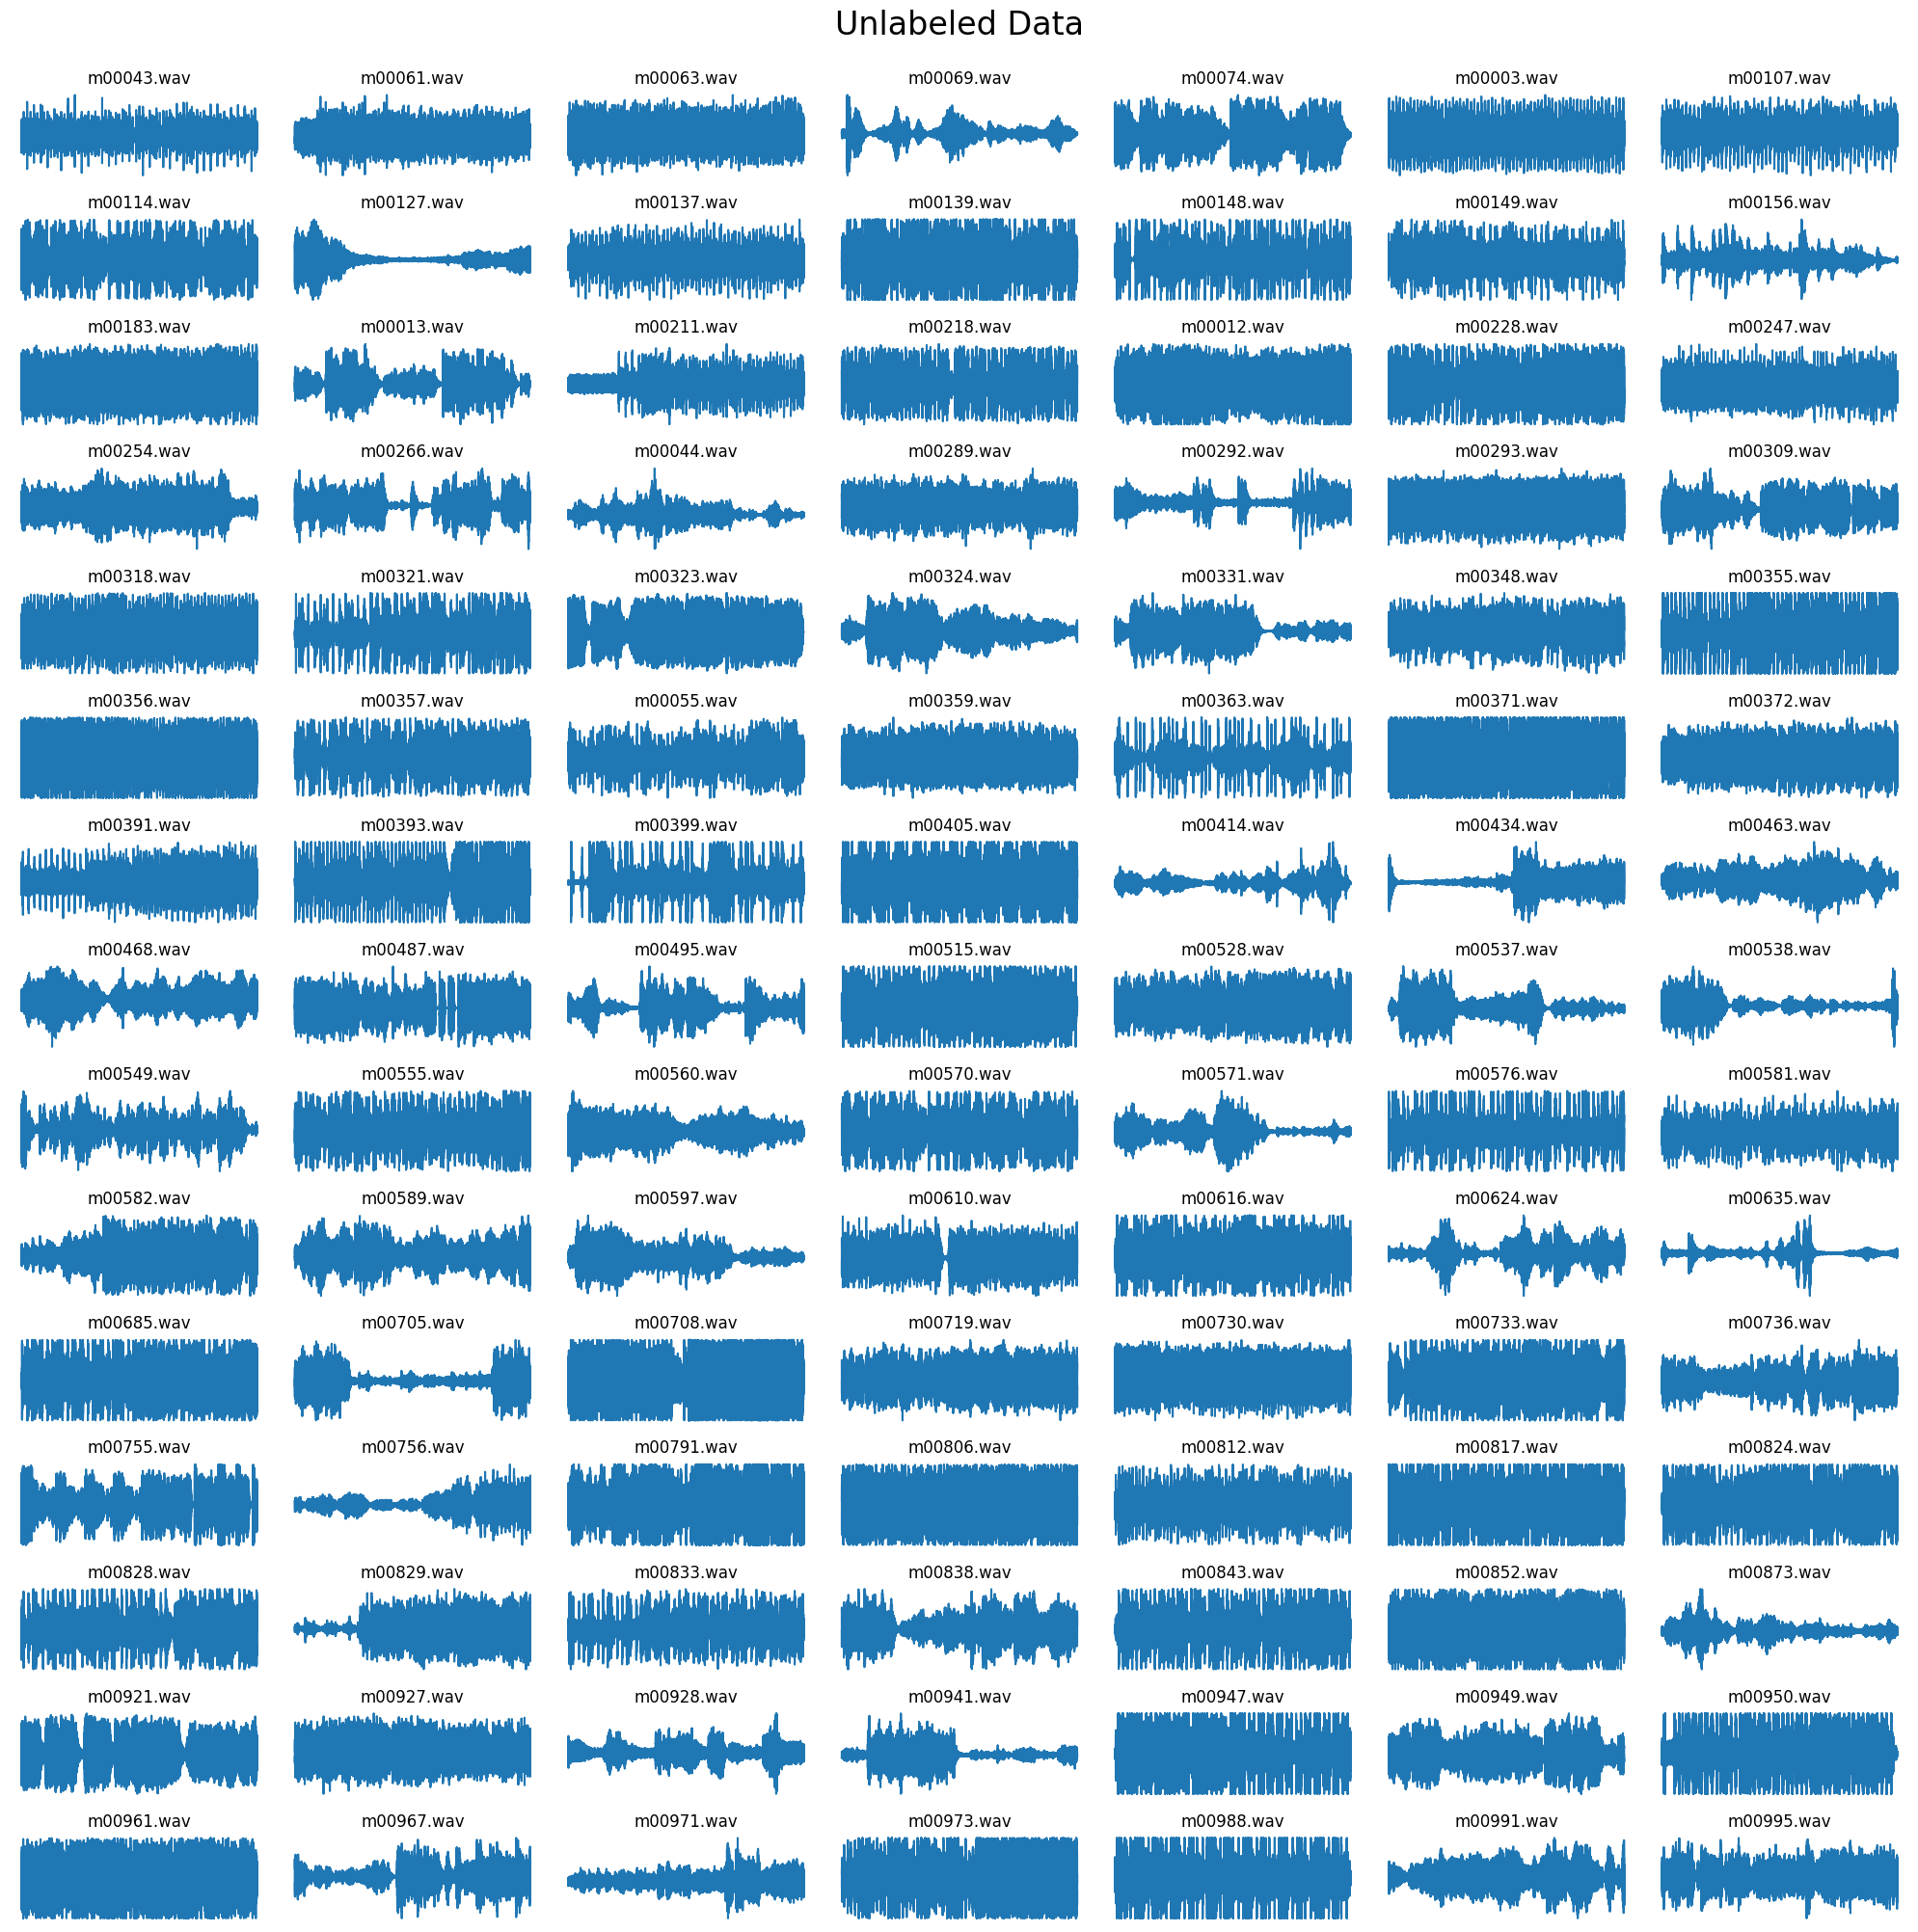

In [38]:
v_un = Visualizer(unlabeled_data, 'Unlabeled Data', 15, 7, figsize=(20, 20))
v_un.subplots()

In [39]:
print(labeled_files)

['m00002.wav', 'm00039.wav', 'm00041.wav', 'm00072.wav', 'm00096.wav', 'm00102.wav', 'm00112.wav', 'm00138.wav', 'm00192.wav', 'm00206.wav', 'm00230.wav', 'm00236.wav', 'm00248.wav', 'm00253.wav', 'm00298.wav', 'm00313.wav', 'm00338.wav', 'm00339.wav', 'm00351.wav', 'm00400.wav', 'm00421.wav', 'm00429.wav', 'm00435.wav', 'm00454.wav', 'm00477.wav', 'm00501.wav', 'm00503.wav', 'm00513.wav', 'm00553.wav', 'm00606.wav', 'm00623.wav', 'm00627.wav', 'm00629.wav', 'm00633.wav', 'm00637.wav', 'm00658.wav', 'm00671.wav', 'm00676.wav', 'm00677.wav', 'm00678.wav', 'm00716.wav', 'm00762.wav', 'm00772.wav', 'm00773.wav', 'm00801.wav', 'm00821.wav', 'm00850.wav', 'm00867.wav', 'm00895.wav', 'm00996.wav']


# 3. Feature Engineering

In [40]:

labeled_features_df = featureDataFrame(labeled_files, 'Datasets/labeled')
unlabeled_features_df = featureDataFrame(unlabeled_files, 'Datasets/unlabeled')

print("Labeled Features DataFrame")
print(labeled_features_df.head())

print("\nUnlabeled Features DataFrame")
print(unlabeled_features_df.head())

Labeled Features DataFrame
   spectral_centroid  spectral_bandwidth  zero_crossing_rate       rms  \
0        1451.862124         1920.270843            0.051224  0.050480   
1        1811.410394         2019.300256            0.072150  0.123665   
2        3110.898196         2992.010638            0.152857  0.198322   
3        2624.814629         2709.897108            0.120217  0.142927   
4        2549.269757         2485.524548            0.115834  0.184340   

   spectral_rolloff  mfcc_mean_1  mfcc_mean_2  mfcc_mean_3  chroma_mean_1  \
0       3047.431199  -298.756134   112.076279     6.488818       0.117655   
1       3854.851374  -169.153351   110.459999    -8.576200       0.412044   
2       6744.988603   -18.845390    71.325661    -3.766896       0.412797   
3       5605.777240   -69.630653    83.072273   -16.599928       0.286717   
4       5583.144894   -91.983772    87.640099    -2.066796       0.432902   

   chroma_mean_2                 tempo  contrast_mean_1  contrast

Explanation: 

Good source: file:///C:/Users/Matthias%20Jenewein/Downloads/Anssi_Klapuri_Manuel_Davy_Signal_Processing_MetBookos.org.pdf

1. Spectral Centroid: 

    -Explanation: The spectral centroid describes the point where the most spectral energy resides in that spectrum. The higher the spectral centroid is, the brighter does the sound sound.

    -Calculation: We used the library librosa to compute the spectral centroid. Librosa calculates the spectral centroid as the weighted mean of the frequencies based on the magnitudes.

    The mathematical formula is the following: 
    $$
    \text{Spectral Centroid} = \frac{\sum_{n=0}^{N-1} f(n)\,x(n)}{\sum_{n=0}^{N-1} x(n)}
    $$
    Where x(n) describes the weighted frequency value and f(n) is the core frequency.

    Mathematically speaking, the specral centroid is the weighted mean of the frequencies calculated via a Fourier transform. 

    https://www.sciencedirect.com/topics/engineering/spectral-centroid
    https://librosa.org/doc-playground/0.7.2/generated/librosa.feature.spectral_centroid.html
    https://en.wikipedia.org/wiki/Spectral_centroid

2. Spectral Bandwith: 

    -Explanation: The spectral bandwith can be considered as the variance of the spectrum. It is the spread of frequencies around the spectral centroid. A larger bandwith means a wider range of frequencies and therefore a rhythmic sounds.

    -Calculation: Librosa calculates the spectral bandwith as the weighted standard deviation of the frequencies around the spectral centroid. 

    The mathematical formula is the following: 
    $$
    \text{Spectral Bandwidth} = \frac{\sum_{n=0}^{N-1} \left(f(n) - \text{Spectral Centroid}\right)^2 \cdot x(n)}{\sum_{n=0}^{N-1} x(n)}
    $$
    Where x(n) describes the weighted frequency value and f(n) is the core frequency.

    https://librosa.org/doc/main/generated/librosa.feature.spectral_bandwidth.html

3. Zero Crossing Rate: 

    -Explanation: The Zero Crossing Rate defines the rate how often the signal crosses the zero amplitude line. A high rate results in a noiser sound and a lower rate results in a smoother sound. 

    -Calculation: Librosa computes the ZCR by adding the number of times the zero amplitude line is crossed and the normalizing this number by the amount of sound segments.

    The mathematical formula is the following: 
    $$
    \text{ZCR} = \frac{1}{T} \sum_{t=1}^{T} \mathbb{I}\left\{x(t-1) \cdot x(t) < 0\right\}
    $$  

    https://librosa.org/doc/main/generated/librosa.feature.zero_crossing_rate.html

4. Root Mean Square (RMS): 

    -Explanation: The RMS describes the loudness (power) of the analysed audio signal. It returns an estimate of the signal's amplitude and higher RMS values mean that the sound is louder. 

    -Calculation: Librosa calculates the RMS as the square root of the mean of the squared amplitudes. 

    The mathematical formula is the following: 
    $$
    \text{RMS} = \sqrt{ \frac{1}{N} \sum_{n=1}^{N} \left(\text{amplitude}_n\right)^2 }
    $$

5. Spectral Rolloff:
    
    -Explanation: The spectral rolloff defines the frequency below most of the total spectral energy lies. This helps distinguish between non-harmonic and harmonic sounds.

    -Calculation: Librosa calculates the Spectral Rolloff by frequency 𝑓(𝑟) where the cumulative sum of the spectral magnitudes reaches a specified ratio 𝑟 of the total sum.

    The mathematical formula is the following: 
    $$
    \text{Spectral Rolloff} = f(r) \quad \text{where} \quad \sum_{n=0}^{k} x(n) = r \cdot \sum_{n=0}^{N-1} x(n)
    $$

6. MFCC Means: 

    -Explanation: Mel-Frequency Cepstral Coefficients (MFCCs) are numbers that represent the quality and texture of a sound. They help capture important details about the sound's characteristics, such as its tone and richness. By calculating the average value of each MFCC across all small segments of the audio, we get a single summary for each MFCC. This summary gives us an overall idea of the sound's main features throughout the entire audio clip.

    -Calculation: Librosa calculates the MFCC Means by first extracting the MFCCs for each frame of the audio signal and then computing the average value of each coefficient across all frames.

    The mathematical formula is the following: 
    $$
    \text{MFCC}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{MFCC}(i, n)
    $$

    MFCC𝑖 is the mean value of the 𝑖-th MFCC coefficient.
    𝑁 is the total number of frames.
    MFCC(𝑖,𝑛) is the value of the 𝑖-th MFCC coefficient in the 𝑛-th frame.

7. Chroma Mean: 

    -Explanation: Chroma features describe the intensity of all the 12 different pitch classes (e.g. C, D, etc.) within an octave. The mean of the chroma features is the average intensity of all pitch classes across all frames.

    -Calculation: Librosa calculates Chroma Mean by mapping the frequency spectrum to pitch classes and then averaging the intensity of each class across all frames.

    The mathematical formula is the following: 
    $$
    \text{Chroma Mean}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{Chroma}(i, n)
    $$

    where:

    𝑖 is the pitch class index (ranging from 0 to 11, corresponding to the twelve semitones in an octave).
    𝑛 is the frame index.
    𝑁 is the total number of frames.
    Chroma(𝑖,𝑛) is the intensity of the 𝑖-th pitch class in the 𝑛-th frame

8. Tempo:
    
    -Explanation: Tempo is the speed of a sound. In most cases it is measured as the BPM (beats per minute). Tempo is an important feature for rhythm and is often used to classify songs into different genres. 

    -Calculation: Librosa calculates the BPM by dividing a minute through the beat interval. 

    The mathematical formula is the following: 
    $$
    \text{Tempo (BPM)} = \frac{60}{\text{Average Beat Interval (seconds)}}
    $$

9. Spectral Contrast Mean: 

    -Explanation: Spectral Contrast measures the difference in amplitude between high-energy regions (peaks) and low-energy regions (valleys) within specific frequency bands. By calculating the mean spectral contrast across all frames, we obtain an average representation of these amplitude differences for each frequency band, aiding in distinguishing between different types of sounds based on their spectral characteristics.

    -Calculation: Librosa computes the Spectral Contrast Mean by dividing the frequency spectrum into multiple subbands, identifying the maximum and minimum magnitudes within each band for every frame, calculating the contrast for each band, and then averaging these contrast values across all frames.
 
    The mathematical formula is the following: 
    $$
    \text{Spectral Contrast}_i = \frac{\max(x_i) - \min(x_i)}{\max(x_i)}
    $$

    where:

    Spectral Contrast 𝑖 is the mean spectral contrast for the 𝑖-th frequency band.
    𝑥𝑖 represents the spectral magnitudes within the 𝑖-th frequency band across all frames.
    max(𝑥𝑖) is the maximum magnitude in the 𝑖-th band.
    min(𝑥𝑖) is the minimum magnitude in the 𝑖-th band.

10. Tonnetz (Mean): 

    -Explanation: The Tonnetz (abbv. for Tonal centroid features) represents the tonal relationship between different pitches. A major third would be an example for such an harmonic relationship. The Tonnetz Mean  is the mean of all these relationsships over a certain period of time. 

    -Calculation: Librosa calculates the Tonnetz Mean by first transforming the chroma features into the Tonnetz space, capturing the harmonic relationships for each frame, and then averaging these relationships across all frames.

    The mathematical formula is the following: 
    $$
    \text{Tonnetz Mean}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{Tonnetz}(i, n)
    $$

    where:

    Tonnetz Mean𝑖 is the mean value of the 𝑖-th Tonnetz dimension.
    𝑁 is the total number of frames.
    Tonnetz(𝑖,𝑛) is the value of the 𝑖-th Tonnetz feature in the 𝑛-th frame.

11. Spectral Flatness:

    -Explanation: Spectral Flatness is how well a sound represents a pure tone. A low value indicates a purer tone. 

    -Calculation: Librosa calculates the Spectral Flatness as the ratio of the geometric mean to the arithmetic mean of the spectral magnitudes.
    
    The mathematical formula is the following: 
    $$
    \text{Spectral Flatness} = \frac{\left( \prod_{n=0}^{N-1} x(n) \right)^{\frac{1}{N}}}{\frac{1}{N} \sum_{n=0}^{N-1} x(n)}
    $$

In [41]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Feature Engineering - Extraction of Sound-Features
def extract_features(files, path):
    features = []
    for file in files:
        y, sr = librosa.load(f'{path}/{file}', sr=None)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0].mean()
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0].mean()
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0].mean()
        zero_crossings = np.mean(librosa.feature.zero_crossing_rate(y=y))
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
        
        features.append([file, spectral_centroid, spectral_bandwidth, spectral_rolloff, zero_crossings] + list(mfccs))
    
    columns = ['filename', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'zero_crossings']
    columns += [f'mfcc_{i}' for i in range(1, len(mfccs)+1)]
    return pd.DataFrame(features, columns=columns)

In [42]:
# Extract Features
labeled_features = extract_features(labeled_files, 'Datasets/labeled')
unlabeled_features = extract_features(unlabeled_files, 'Datasets/unlabeled')

# Normalisation of Features
scaler = StandardScaler()
labeled_scaled = scaler.fit_transform(labeled_features.iloc[:, 1:])
unlabeled_scaled = scaler.transform(unlabeled_features.iloc[:, 1:])

# Determine optimal Cluster number
inertia = []
silhouette = []
k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(unlabeled_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(unlabeled_scaled, kmeans.labels_))

To identify the optimal number of clusters, we employed the Elbow Method and Silhouette Analysis.

Elbow Method: This technique evaluates the inertia (within-cluster sum of squares) across a range of cluster numbers. By plotting the inertia values against the number of clusters, we identify the point at which the rate of decrease in inertia begins to slow down, forming an “elbow” shape. This indicates the optimal cluster count.
source:https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189

Silhouette Score: In addition, we plotted the silhouette score, which measures how similar an object is to its own cluster compared to other clusters. Higher silhouette values indicate better-defined clusters. 
source: https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


We iterated over cluster values ranging from 2 to 14. For each cluster count, a KMeans model was fitted to the scaled feature data of the “unlabeled” dataset. Inertia and silhouette scores were recorded for each iteration and visualized to assess the ideal number of clusters.

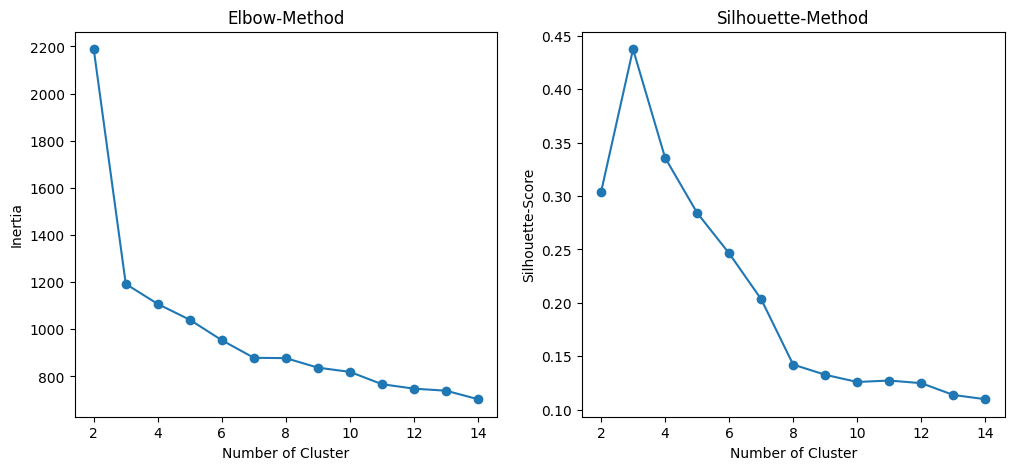

In [43]:


# Visualisation of the  optimal Cluster number
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'o-')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Method')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, 'o-')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette-Score')
plt.title('Silhouette-Method')
plt.show()



After determining the optimal number of clusters, we applied the KMeans algorithm to the dataset and assigned each sound clip to a cluster. 

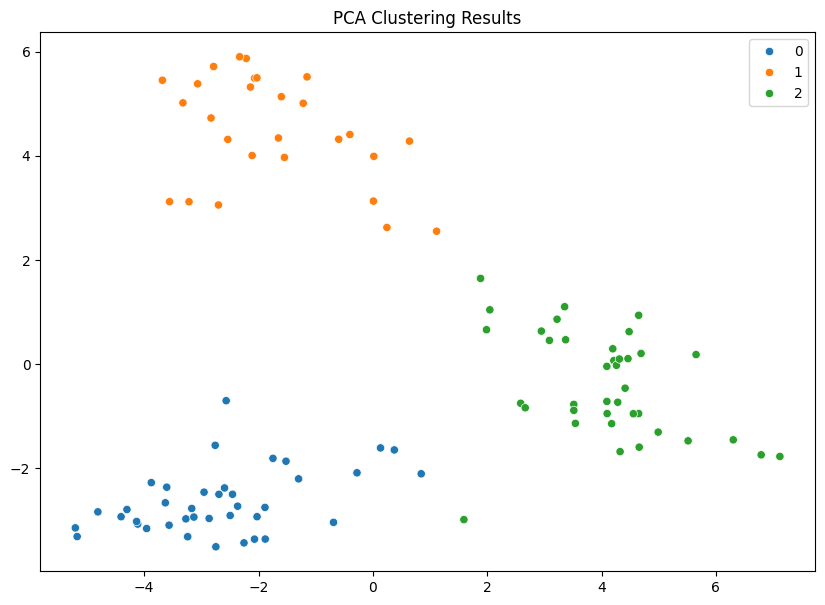

In [44]:
# optimal Cluster 
optimal_k = k_values[np.argmax(silhouette)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(unlabeled_scaled)

unlabeled_features['cluster'] = kmeans_labels

# Dimensionality Reduction (PCA und NMF)
pca = PCA(n_components=5)
pca_features = pca.fit_transform(unlabeled_scaled)

nmf = NMF(n_components=5, random_state=42)
nmf_features = nmf.fit_transform(np.abs(unlabeled_scaled))

# Clustering with PCA
pca_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_labels = pca_kmeans.fit_predict(pca_features)

# Clustering with NMF
nmf_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
nmf_labels = nmf_kmeans.fit_predict(nmf_features)

# Compare Clustering Results
unlabeled_features['pca_cluster'] = pca_labels
unlabeled_features['nmf_cluster'] = nmf_labels

# Visualisation of the Clustering Results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=pca_labels, palette='tab10')
plt.title('PCA Clustering Results')
plt.show()



In [45]:
# Kaggle-Submission
submission = unlabeled_features[['filename', 'cluster']]
submission.columns = ['filename', 'genre']
submission['genre'] = submission['genre'].map(lambda x: f'genre_{x}')

submission.to_csv('submission.csv', index=False)

print("Submission successfull!")

Submission successfull!


# 6. Conclusion

## 7. Sources

Librosa. (n.d.). Spectral centroid. Retrieved January 2, 2025, from https://librosa.org/doc-playground/0.7.2/generated/librosa.feature.spectral_centroid.html

Librosa. (n.d.). Spectral bandwidth. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_bandwidth.html#id1

Librosa. (n.d.). Zero crossing rate. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.zero_crossing_rate.html

Librosa. (n.d.). Root-mean-square energy (RMS). Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.rms.html

Librosa. (n.d.). Spectral rolloff. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_rolloff.html

Librosa. (n.d.). Mel-frequency cepstral coefficients (MFCC). Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.mfcc.html

Librosa. (n.d.). Chroma short-time Fourier transform. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.chroma_stft.html

Librosa. (n.d.). Dynamic beat tracking. Retrieved January 2, 2025, from https://librosa.org/doc/main/auto_examples/plot_dynamic_beat.html

Librosa. (n.d.). Spectral contrast. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_contrast.html

Librosa. (n.d.). Tonnetz. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.tonnetz.html

Librosa. (n.d.). Spectral flatness. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_flatness.html

Wikipedia contributors. (n.d.). Spectral flatness. Wikipedia. Retrieved January 2, 2025, from https://en.wikipedia.org/wiki/Spectral_flatness

Anssi_Klapuri_Manuel_Davy_Signal_Processing_MetBookos.org.pdf